In [5]:
import os
import sys

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))


In [7]:
from math import pi, sqrt
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib
import numpy as np
from matplotlib.lines import Line2D

from src import ROOT_DIR


In [8]:
sns.set_theme("paper", "whitegrid", "Dark2", "DejaVu Sans", rc={"figure.dpi": 100})


In [13]:
csv_paths = [
    (
        f"{ROOT_DIR}/predicting/out/SimplePredictor_mse__2022-10-09_12:20:49.csv",
        f"{ROOT_DIR}/predicting/out/SimplePredictor_cos__2022-10-09_12:22:08.csv",
    ),
    (
        f"{ROOT_DIR}/predicting/out/PcaPredictor_mse_pca_emb_10_2022-10-09_12:34:19.csv",
        f"{ROOT_DIR}/predicting/out/PcaPredictor_cos_pca_emb_10_2022-10-09_12:35:58.csv",
    ),
    (
        f"{ROOT_DIR}/predicting/out/PcaPredictor_mse_pca_emb_100_2022-10-09_12:38:01.csv",
        f"{ROOT_DIR}/predicting/out/PcaPredictor_cos_pca_emb_100_2022-10-09_12:39:38.csv",
    ),
    (
        f"{ROOT_DIR}/predicting/out/PcaPredictor_mse_pca_emb_1000_2022-10-09_12:41:43.csv",
        f"{ROOT_DIR}/predicting/out/PcaPredictor_cos_pca_emb_1000_2022-10-09_12:43:22.csv",
    ),
    (
        f"{ROOT_DIR}/predicting/out/ResnetPredictor_mse_resnet-D-2_-2_2022-10-09_12:55:55.csv",
        f"{ROOT_DIR}/predicting/out/ResnetPredictor_cos_resnet-D-2_-2_2022-10-09_12:57:30.csv",
    ),
    (
        f"{ROOT_DIR}/predicting/out/ResnetPredictor_mse_resnet-D-2_-1_2022-10-09_12:52:03.csv",
        f"{ROOT_DIR}/predicting/out/ResnetPredictor_cos_resnet-D-2_-1_2022-10-09_12:53:56.csv",
    ),
    (
        f"{ROOT_DIR}/predicting/out/GlowSimplePredictor_mse_128-2_2022-10-09_12:53:43.csv",
        f"{ROOT_DIR}/predicting/out/GlowSimplePredictor_cos_128-2_2022-10-09_13:03:38.csv",
    ),
    (
        f"{ROOT_DIR}/predicting/out/GlowBayesPredictor_mse_128-2_2022-10-09_13:13:48.csv",
        f"{ROOT_DIR}/predicting/out/GlowBayesPredictor_cos_128-2_2022-10-09_13:24:15.csv",
    ),
    (
        f"{ROOT_DIR}/predicting/out/GlowWeightedPredictor_mse_128-2_2022-10-09_13:35:16.csv",
        f"{ROOT_DIR}/predicting/out/GlowWeightedPredictor_cos_128-2_2022-10-09_13:51:23.csv",
    ),
]


In [10]:
names = [
    "Simple\n(Pixels)",
    "PCA\n(10)",
    "PCA\n(100)",
    "PCA\n(1000)",
    "ResNet\n(Penultimate)",
    "ResNet\n(Final)",
    "Glow\n(Simple)",
    "Glow\n(Bayesian)",
    "Glow\n(Reweighted)",
]


In [11]:
def mean_of_results(df):
    all = []
    r_8c2 = []
    r_2c1 = []

    for r in df["result"]:
        r_list = list(map(int, r.replace("[", "").replace(",", "").replace("]", "").split()))
        all.extend(r_list)

        if len(r_list) == 1:
            r_2c1.extend(r_list)
        elif len(r_list) == 13:
            r_8c2.extend(r_list)
        else:
            print("Error in mean_of_results")

    return np.mean(all), np.mean(r_8c2), np.mean(r_2c1)


## Main Results

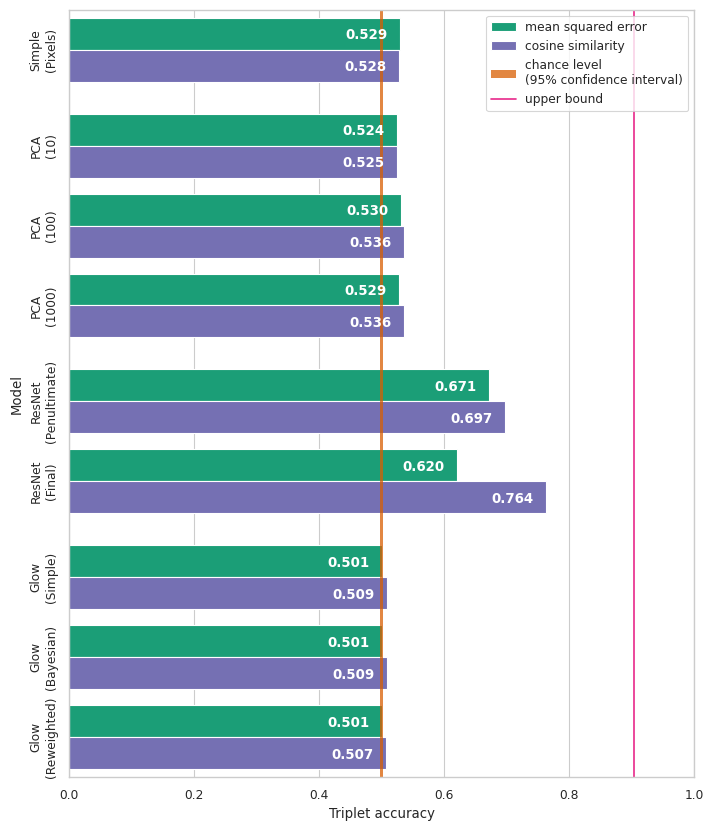

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7.0866, 8.5), tight_layout=True)

h = 2.5

means_8c2 = []
means_2c1 = []

offset = 0
y_tick_labels = []

for i, (path1, path2) in enumerate(csv_paths):
    if i in [1, 4, 6]:
        offset -= 0.5

    df_mse = pd.read_csv(path1, header=1)
    df_cos = pd.read_csv(path2, header=1)

    mse_mean, mse_mean_8c2, mse_mean_2c1 = mean_of_results(df_mse)
    cos_mean, cos_mean_8c2, cos_mean_2c1 = mean_of_results(df_cos)

    if i == 0:
        plt.barh(-i * h + 0.5, mse_mean, height=1.0, fc="C0", label="mean squared error")
        plt.barh(-i * h - 0.5, cos_mean, height=1.0, fc="C2", label="cosine similarity")
    else:
        plt.barh(-i * h + 0.5 + offset, mse_mean, height=1.0, fc="C0")
        plt.barh(-i * h - 0.5 + offset, cos_mean, height=1.0, fc="C2")

    plt.text(
        mse_mean - 0.02,
        -i * h + 0.5 + offset,
        f"{mse_mean:.3f}",
        fontweight="bold",
        ha="right",
        va="center_baseline",
        color="white",
    )
    plt.text(
        cos_mean - 0.02,
        -i * h - 0.5 + offset,
        f"{cos_mean:.3f}",
        fontweight="bold",
        ha="right",
        va="center_baseline",
        color="white",
    )

    means_8c2.append(mse_mean_8c2)
    means_8c2.append(cos_mean_8c2)
    means_2c1.append(mse_mean_2c1)
    means_2c1.append(cos_mean_2c1)

    y_tick_labels.append(-i * h + offset)

plt.fill_betweenx(
    [-22.75, 1.25],
    [0.49718648195070586, 0.49718648195070586],
    [0.5028135180492942, 0.5028135180492942],
    lw=0,
    color="C1",
    alpha=0.75,
    label="chance level\n(95% confidence interval)",
)

ax.axvline(0.903, color="C3", label="upper bound")

plt.xlim(0, 1)
plt.ylim(-22.75, 1.25)

plt.yticks(y_tick_labels, names, wrap=True, ha="center", va="bottom", rotation=90)

plt.xlabel("Triplet accuracy")
plt.ylabel("Model")

plt.grid(False, "both", "y")

handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 0, 1]
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc="upper right")

plt.show()


## Correlation of 8-rank-2 and 2-choose-1 trials

[0.5286839243747589, 0.5287277701778386, 0.5241502683363148, 0.5255094882317864, 0.5301483741976218, 0.5367953979445087, 0.5287716159809183, 0.5361289417376969, 0.6745852187028658, 0.7002174751832755, 0.6212862604791469, 0.7679943175839209, 0.5007366094917395, 0.5085060857974675, 0.5007629169735873, 0.5085323932793153, 0.5008681469009786, 0.5066119471044231]
[0.5289893617021276, 0.5222074468085106, 0.5232712765957447, 0.5199468085106383, 0.5323138297872341, 0.5299202127659575, 0.5248670212765958, 0.5320478723404255, 0.6224734042553192, 0.6518617021276596, 0.605718085106383, 0.6977393617021277, 0.5042553191489362, 0.5162234042553191, 0.5042553191489362, 0.5162234042553191, 0.5014627659574468, 0.5097074468085107]


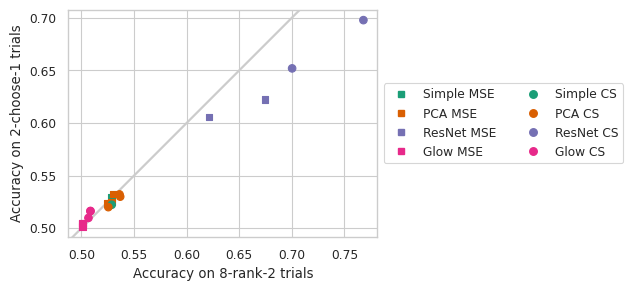

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7.0866, 3.0), tight_layout=True)

print(means_8c2)
print(means_2c1)

colors = ["C0", "C1", "C1", "C1", "C2", "C2", "C3", "C3", "C3"]

plt.plot(
    [0, 1], [0, 1], c=plt.rcParams["grid.color"], lw=2 * plt.rcParams["grid.linewidth"], zorder=-4
)

square_s = plt.rcParams["lines.markersize"]
x = [means_8c2[i] for i in range(len(means_8c2)) if i % 2 == 0]
y = [means_2c1[i] for i in range(len(means_2c1)) if i % 2 == 0]
plt.scatter(x, y, s=square_s**2, marker="s", c=colors)

circle_s = square_s * 2 / sqrt(pi)
x = [means_8c2[i] for i in range(len(means_8c2)) if i % 2 == 1]
y = [means_2c1[i] for i in range(len(means_2c1)) if i % 2 == 1]
plt.scatter(x, y, s=circle_s**2, marker="o", c=colors)

plt.xticks(np.arange(0.5, 0.751, 0.05))
plt.yticks(np.arange(0.5, 0.701, 0.05))

plt.gca().set_aspect("equal", "box")
plt.ylim(0.4916489361702127, 0.7075531914893617)
plt.xlim(0.4873737240871304, 0.78135720298853)

plt.xlabel("Accuracy on 8-rank-2 trials")
plt.ylabel("Accuracy on 2-choose-1 trials")


legend_elements = [
    Line2D([0], [0], ls="", ms=square_s, marker="s", color="C0", label="Simple MSE"),
    Line2D([0], [0], ls="", ms=square_s, marker="s", color="C1", label="PCA MSE"),
    Line2D([0], [0], ls="", ms=square_s, marker="s", color="C2", label="ResNet MSE"),
    Line2D([0], [0], ls="", ms=square_s, marker="s", color="C3", label="Glow MSE"),
    Line2D([0], [0], ls="", ms=circle_s, marker="o", color="C0", label="Simple CS"),
    Line2D([0], [0], ls="", ms=circle_s, marker="o", color="C1", label="PCA CS"),
    Line2D([0], [0], ls="", ms=circle_s, marker="o", color="C2", label="ResNet CS"),
    Line2D([0], [0], ls="", ms=circle_s, marker="o", color="C3", label="Glow CS"),
]

plt.legend(handles=legend_elements, loc="center left", bbox_to_anchor=(1, 0.5), ncol=2)

plt.show()
